In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataframe_.csv')

In [6]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [12]:
df = df.dropna()

In [13]:
print(df.describe())

             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495


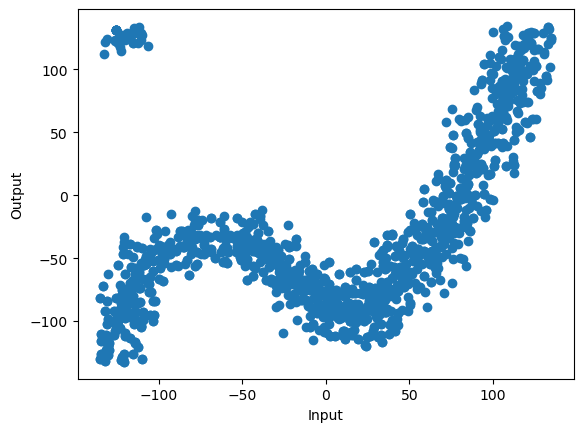

In [14]:
plt.scatter(df['input'], df['output'])
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

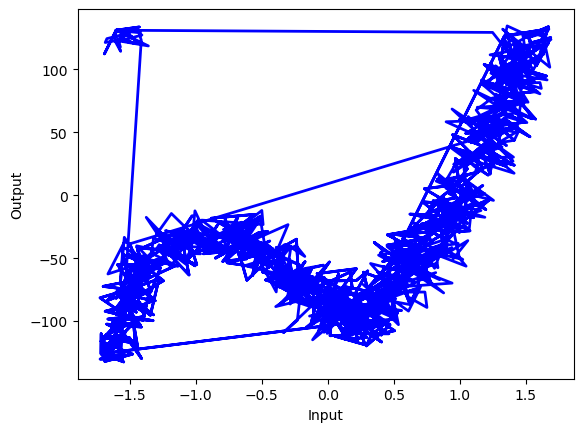

In [55]:
plt.plot(df['input'], df['output'], color='blue', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['input'].values.reshape(-1, 1), df['output'].values, test_size=0.2, random_state=0)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error: ", mse)

Mean Squared Error:  3291.4050360956003


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statistics
from scipy.stats import zscore

#Detect and treat outliers
# Use the Z-score method to detect outliers

In [36]:
z = np.abs(zscore(df))
threshold = 3
outliers = np.where(z > threshold)
print(outliers)

(array([], dtype=int64), array([], dtype=int64))


In [37]:
df = df[(z < threshold).all(axis=1)]
df['input_squared'] = df['input']**2
X_train, X_test, y_train, y_test = train_test_split(df[['input', 'input_squared']], df['output'].values, test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])


# Define Hyperparameters to tune

In [53]:
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error: ", mse)

Mean Squared Error:  3291.4050360956003


/Users/hemanthk/ana/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/hemanthk/ana/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [50]:
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("r2_score:",r2)

Mean absolute error: 33.640446296371415
Mean squared error: 1939.923381791618
r2_score: 0.5876589567660486


#  Linear Regression model by performing appropriate feature engineering.

Mean Squared Error: 3291.4050360956


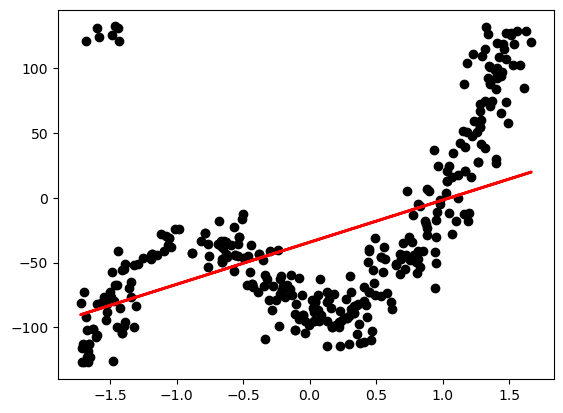

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df['input'] = (df['input'] - df['input'].mean()) / df['input'].std()

X_train, X_test, y_train, y_test = train_test_split(df[['input']], df['output'], test_size=0.2, random_state=0)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
